# Country-wise Steam Players Comparison (Hours vs Points)

# 1. Importing Libraries

Loading all the necessary libraries would be done. This includes `pandas`, `numpy`, `matplotlib` and `warnings`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

***

# 2. Loading the Dataset

This project focuses on taking in the `Steam Country Dataset`, that include the `Countries`, its no. of `Players`, and the `Points` or `XP` gained overall by that country till date.

In [2]:
filepath = 'C:/Users/Samik Bhatia/Documents/Jupyter Files/csvfiles/country_data.csv'
country_dataframe = pd.read_csv(filepath, header = 0)

In [3]:
country_dataframe.head(10)

,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
0,0,Unknown,135643,86532124.75,137664177,31410891,5453964,2252121996,412471186.4
1,1,United States,59698,52132889.98,84410455,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,37279292,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,28423805,6658939,1381807,590848431,86523185.4
4,4,United Kingdom (Great Britain),16225,15635912.83,25101789,5780703,786975,294574732,68131144.6
5,5,Canada,12483,10999031.70,17436104,4012880,606502,239174494,49354715.3
6,6,China,15605,10847234.66,17138407,6168652,1100485,506417923,54823363.8
7,7,Brazil,15569,10136859.28,16173137,3918546,774781,247132541,54157619.5
8,8,Poland,11358,9085626.49,13802221,3123884,523117,178278957,39163756.6
9,9,Japan,9548,8802348.47,13143190,3328328,698257,265270862,38756414.3


In [4]:
country_dataframe.describe()

,Rank,Players,Points,Number,Games,Badges,XP,Hours
count,253.000000,253.000000,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,126.000000,1836.355731,1.389446e+06,2.187685e+06,5.158577e+05,9.156419e+04,3.623566e+07,6.476821e+06
std,73.179004,9777.432248,6.817831e+06,1.084677e+07,2.517633e+06,4.171119e+05,1.700937e+08,3.185529e+07
min,0.000000,1.000000,5.400000e-01,1.000000e+00,3.000000e+00,2.000000e+00,1.560000e+02,1.390000e+01
25%,63.000000,41.000000,2.191154e+04,3.788700e+04,7.069000e+03,1.427000e+03,4.423540e+05,1.314644e+05
50%,126.000000,102.000000,5.478048e+04,9.217000e+04,2.060400e+04,4.260000e+03,1.762010e+06,3.501921e+05
75%,189.000000,502.000000,2.908862e+05,4.827490e+05,1.040740e+05,2.629900e+04,1.021018e+07,1.667536e+06
max,252.000000,135643.000000,8.653212e+07,1.376642e+08,3.141089e+07,5.453964e+06,2.252122e+09,4.124712e+08


**The values are quite large, and it would be difficult to implement any model without the basic data extraction and scaling. Over the next few steps, the data would be compressed and would be refined to the values at which the Linear model can be implemented.**

The `Country` row with the `Unknown` data is useless for any model, so removing it would result in a better dataset to work on. Also, checking for null values is a must, as there are only 250+ rows to work with.

***

# 3. Checking for Null Values

In [5]:
country_dataframe.isnull()

,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
248,False,False,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False


In [6]:
country_dataframe.isnull().sum()

Rank       0
Country    0
Players    0
Points     0
Number     0
Games      0
Badges     0
XP         0
Hours      0
dtype: int64

There are no NULL values, which makes our dataset as accurate as it should be.

In [7]:
country_dataframe.shape

(253, 9)

***

# 4. Feature Transformation

In [8]:
country_dataframe.drop(index=0, inplace = True)

Dropping the first row would get rid of the `Unknown` data row. This would also start the `Index` values and `Rank` values from 1 instead of zero, making the dataset more clear and easier to look at.

In [9]:
country_dataframe.replace(to_replace = "United Kingdom (Great Britain)", value = "United Kingdom", inplace = True)

`United Kingdom (Great Britain)` is a big name, that isn't required. Simply converting it to `United Kingdom` makes the value short and precise.

In [10]:
country_dataframe.head()

,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
1,1,United States,59698,52132889.98,84410455,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,37279292,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,28423805,6658939,1381807,590848431,86523185.4
4,4,United Kingdom,16225,15635912.83,25101789,5780703,786975,294574732,68131144.6
5,5,Canada,12483,10999031.70,17436104,4012880,606502,239174494,49354715.3


In [11]:
country_dataframe.drop("Number", axis = 1, inplace = True)

In [12]:
country_dataframe.head()

,Rank,Country,Players,Points,Games,Badges,XP,Hours
1,1,United States,59698,52132889.98,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,6658939,1381807,590848431,86523185.4
4,4,United Kingdom,16225,15635912.83,5780703,786975,294574732,68131144.6
5,5,Canada,12483,10999031.70,4012880,606502,239174494,49354715.3


The `Number` column is removed, as it has no signifacance in the dataset.

***

# 5. Creating a Top 10 Dataframe

Over the next series of steps, a new dataframe copy called as `top_10_dataframe` will be created, that would include only the first 10 rows of the original dataset. This can be used to perform basic country comparisons and get an idea of how the data should be handled before the model is implemented.

In [13]:
top_10_dataframe = country_dataframe.iloc[0:10]
top_10_dataframe

,Rank,Country,Players,Points,Games,Badges,XP,Hours
1,1,United States,59698,52132889.98,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,6658939,1381807,590848431,86523185.4
4,4,United Kingdom,16225,15635912.83,5780703,786975,294574732,68131144.6
5,5,Canada,12483,10999031.70,4012880,606502,239174494,49354715.3
6,6,China,15605,10847234.66,6168652,1100485,506417923,54823363.8
7,7,Brazil,15569,10136859.28,3918546,774781,247132541,54157619.5
8,8,Poland,11358,9085626.49,3123884,523117,178278957,39163756.6
9,9,Japan,9548,8802348.47,3328328,698257,265270862,38756414.3
10,10,France,7675,7817051.60,2362871,384431,130107826,29692105.0


<AxesSubplot:xlabel='Country'>

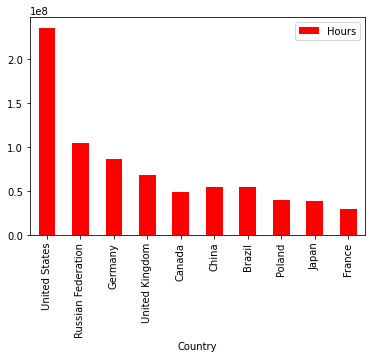

In [14]:
top_10_dataframe.plot(x = "Country", y = "Hours", kind = 'bar', color = 'red')

***

<AxesSubplot:xlabel='Country'>

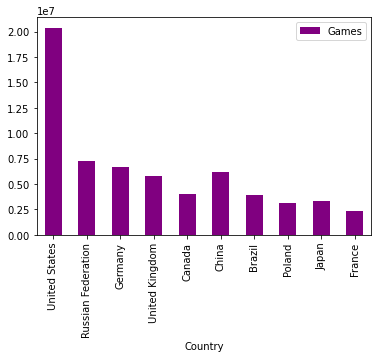

In [15]:
top_10_dataframe.plot(x = "Country", y = "Games", kind = 'bar', color = 'purple')

***

<AxesSubplot:xlabel='Country'>

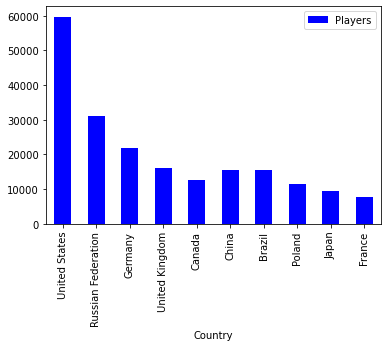

In [16]:
top_10_dataframe.plot(x = "Country", y = "Players", kind = 'bar', color = 'blue')

***

<AxesSubplot:xlabel='Country'>

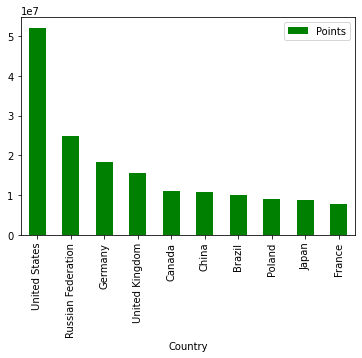

In [17]:
top_10_dataframe.plot(x = "Country", y = "Points", kind = 'bar', color = 'green')

***

<AxesSubplot:xlabel='Country'>

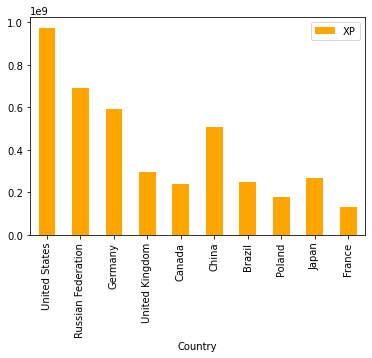

In [18]:
top_10_dataframe.plot(x = "Country", y = "XP", kind = 'bar', color = 'orange')

***

<AxesSubplot:xlabel='Country'>

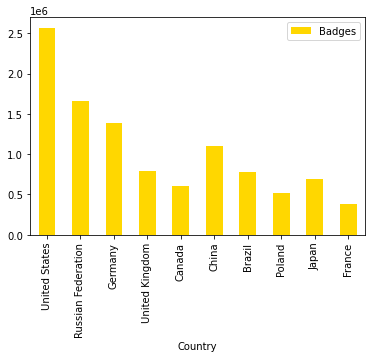

In [19]:
top_10_dataframe.plot(x = "Country", y = "Badges", kind = 'bar', color = 'gold')

The results show how `United States` is dominating in every aspect. However, the data of the respective countries do not follow the exact downwards trajectory of `Points`, `Badges`, `XP` or `Games`. This shows that some countries spend more money on `Games` but still lack behind those countries who buy less and have more `Points` and `XP`.

***

# 6. Creating a Player Average Dataframe

To handle the massive numbers in the data, a basic logic is applied. Every gamer has some `Points` or `XP` earned, but the data shows the overall numbers. If we know the number of `Players`, we can simply divide the other data values to get the average of all columns, and basically merge the columns with the `Players` column.

A new dataset called `player_avg_dataframe`, contains the average of all columns with respect to the number of `Players` in the `Country`. This would help simplify the data and would be easier to use for the regression models to be applied.

In [20]:
player_avg_dataframe = country_dataframe.copy()
player_avg_dataframe.columns

Index(['Rank', 'Country', 'Players', 'Points', 'Games', 'Badges', 'XP',
       'Hours'],
      dtype='object')

In [21]:
for i, column in enumerate(player_avg_dataframe.columns):
    if (i>2):
        player_avg_dataframe[column + "_avg"] =  player_avg_dataframe[column] / player_avg_dataframe["Players"]
        del player_avg_dataframe[column]
    print(i, column)
player_avg_dataframe

0 Rank
1 Country
2 Players
3 Points
4 Games
5 Badges
6 XP
7 Hours


,Rank,Country,Players,Points_avg,Games_avg,Badges_avg,XP_avg,Hours_avg
1,1,United States,59698,873.276994,341.371587,43.036919,16330.458407,3955.532690
2,2,Russian Federation,31058,797.023096,233.365188,53.363964,22326.760674,3369.698049
3,3,Germany,21750,837.441938,306.158115,63.531356,27165.445103,3978.077490
4,4,United Kingdom,16225,963.692624,356.283698,48.503852,18155.607519,4199.146046
5,5,Canada,12483,881.120860,321.467596,48.586237,19160.017143,3953.754330
...,...,...,...,...,...,...,...,...
248,248,Mauritania,10,323.150000,78.800000,14.400000,4329.200000,2457.440000
249,249,French Guiana,7,369.667143,157.142857,11.571429,2387.000000,2952.142857
250,250,Anguilla,14,149.268571,44.714286,8.285714,1530.500000,1297.800000
251,251,"Moldova, Republic of",2,308.510000,64.500000,58.000000,8743.000000,969.950000


We don't require the following columns in this dataset- 

1. `Rank` - It is the same as the index of the columns.
2. `Countries` - We don't require non-numeric data columns.
3. `Players` - The player column is already used to calculate the average of all the other respective columns, reducing it's overall significance ahead.

**These columns would be removed,  and we will have a nice dataset to work with.**

In [22]:
player_avg_dataframe.drop("Players", axis = 1, inplace = True)
player_avg_dataframe.drop("Rank", axis = 1, inplace = True)
player_avg_dataframe.drop("Country", axis = 1, inplace = True)
player_avg_dataframe

,Points_avg,Games_avg,Badges_avg,XP_avg,Hours_avg
1,873.276994,341.371587,43.036919,16330.458407,3955.532690
2,797.023096,233.365188,53.363964,22326.760674,3369.698049
3,837.441938,306.158115,63.531356,27165.445103,3978.077490
4,963.692624,356.283698,48.503852,18155.607519,4199.146046
5,881.120860,321.467596,48.586237,19160.017143,3953.754330
...,...,...,...,...,...
248,323.150000,78.800000,14.400000,4329.200000,2457.440000
249,369.667143,157.142857,11.571429,2387.000000,2952.142857
250,149.268571,44.714286,8.285714,1530.500000,1297.800000
251,308.510000,64.500000,58.000000,8743.000000,969.950000


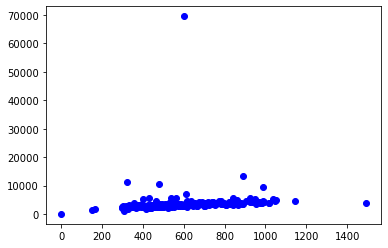

In [23]:
ax = plt.axes()
ax.scatter(player_avg_dataframe.Points_avg, player_avg_dataframe.Hours_avg, color = 'blue', marker = 'o')

***

# 7. Removing Outliers

The data consists of different `Outliers`, as the `Scatter Plot` shows. We need to set the limits of the data values, to eliminate massive errors and outlying data values. 

Copying the `Hours_avg` column into another array, and using it as an outlier identifier, would simplify the data.

A `Location` list and an `Outliers` list would be created, that stores the outlier values and the location of the outlier values respectively.

In [24]:
player_avg_dataframe.shape[0]

252

In [25]:
X = player_avg_dataframe.iloc[:,-1]
X

1      3955.532690
2      3369.698049
3      3978.077490
4      4199.146046
5      3953.754330
          ...     
248    2457.440000
249    2952.142857
250    1297.800000
251     969.950000
252      13.900000
Name: Hours_avg, Length: 252, dtype: float64

In [26]:
X.shape

(252,)

In [27]:
outliers = []
location = []
for i in range (1, player_avg_dataframe.shape[0]):
    if X[i] > 7000:
        outliers.append(X[i])
        location.append(i)

outliers
location

[115, 140, 167, 236, 242]

In [28]:
flag = 0
for i in range (1, location[len(location)-1] + 1):
    if i == location[flag]:
        player_avg_dataframe.drop(index = i, inplace = True)
        if flag < len(location):
            flag = flag + 1

**The Average dataframe is now created, with no outliers in terms of hours and no unnecessary columns. This dataframe would be used to perform the ahead steps.**

***

# 9. Visualizing the Data

[Text(0.5, 0, 'Average Hours'),
 Text(0, 0.5, 'No. of Countries'),
 Text(0.5, 1.0, 'Frequency of Average hours per country')]

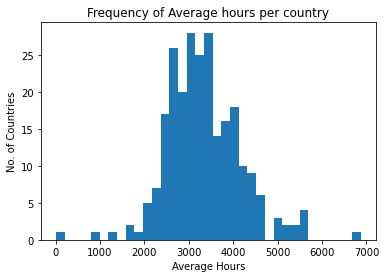

In [29]:
ax = plt.axes()
ax.hist(player_avg_dataframe.Hours_avg, bins = 35)
ax.set(xlabel = 'Average Hours',
       ylabel = 'No. of Countries',
       title = 'Frequency of Average hours per country')

(array([ 1.,  2.,  7., 51., 87., 62., 25.,  7.,  4.,  1.]),
 array([  13.9,  699.1, 1384.3, 2069.5, 2754.7, 3439.9, 4125.1, 4810.3,
        5495.5, 6180.7, 6865.9]),
 <BarContainer object of 10 artists>)

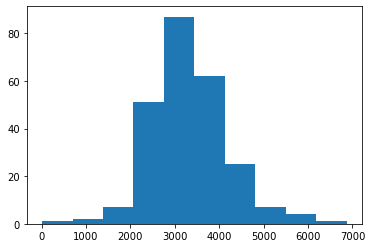

In [30]:
plt.hist(player_avg_dataframe.Hours_avg)

***

# 10. Normally Distributing the Data

**The histogram shows how the data is not normalized, and this would create serious problems while working with regression models. Implementation of the following transformations might normalize the data-**

1. `Square Root Transformation`
2. `Log Transformation`
3. `Boxcox Method`

The best method out of these three would be used to transform and normalize the data, and to check the same, we would include `Normal Test`.

The `p-value` should be `>0.05`, which shows the data is normalized. Even a number close to this value would be good for the data.

In [31]:
from scipy.stats.mstats import normaltest

In [32]:
normaltest(player_avg_dataframe.Hours_avg.values)

NormaltestResult(statistic=21.20164036290171, pvalue=2.4895582460671533e-05)

Currently, the `p-value` is `significantly smaller` then it should be. So, the previously discussed methods of normalization would be used.

***

## 1. Log Transformation

In [33]:
log_hours_avg = np.log(player_avg_dataframe.Hours_avg)

<AxesSubplot:>

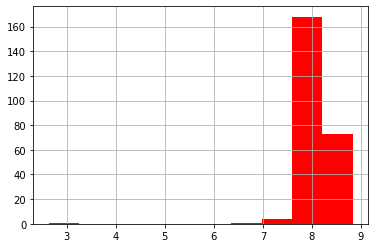

In [34]:
log_hours_avg.hist(color = 'red')

In [35]:
normaltest(log_hours_avg)

NormaltestResult(statistic=409.94465555419526, pvalue=9.586257786622163e-90)

This is even `worse` than the original dataframe, and `significantly destroys the data`. Log transformation is definitely not the way to go.

***

## 2. Square Root Transformation

In [36]:
sqrt_hours_avg = np.sqrt(player_avg_dataframe.Hours_avg)

<AxesSubplot:>

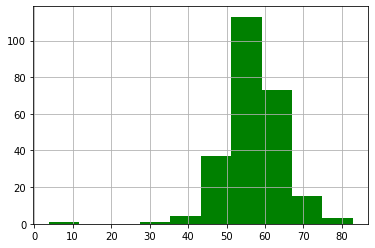

In [37]:
sqrt_hours_avg.hist(color = 'green')

In [38]:
normaltest(sqrt_hours_avg)

NormaltestResult(statistic=90.93577910552902, pvalue=1.7928603531391268e-20)

Still `worse` than the original dataset, but better than the Log Transformation method. Square Root transformation doesn't help in this process.

***

## 3. Boxcox Method

In [39]:
from scipy.stats import boxcox

In [40]:
bc_result = boxcox(player_avg_dataframe.Hours_avg)

In [41]:
boxcox_hours_avg = bc_result[0]
lam = bc_result[1]

(array([ 1.,  1.,  4., 24., 86., 75., 42.,  8.,  5.,  1.]),
 array([  10.79074143,  328.91684112,  647.04294081,  965.1690405 ,
        1283.29514019, 1601.42123988, 1919.54733958, 2237.67343927,
        2555.79953896, 2873.92563865, 3192.05173834]),
 <BarContainer object of 10 artists>)

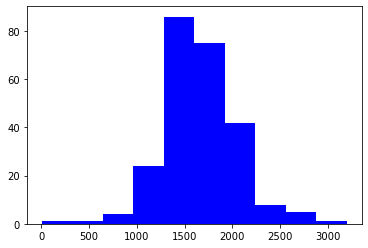

In [42]:
plt.hist(boxcox_hours_avg, color = 'blue')

In [43]:
normaltest(boxcox_hours_avg)

NormaltestResult(statistic=18.311123566742562, pvalue=0.00010563067104395085)

The `p-value is closer to 0.05` this time, which shows the data is quite normalized. `Boxcox method` turns out to be the best method out of all 3 methods.

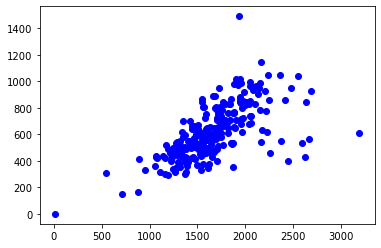

In [44]:
ax = plt.axes()
ax.scatter(boxcox_hours_avg, player_avg_dataframe.Points_avg, color = 'blue', marker = 'o')

***

# 11. Regression Techniques

**The scatter plot shows the data being reasonable, and ready to work with. It has less to no outliers, and the data seems to be linearly increasing. The regression methods can now be implemented.** 

The comparison would be between the `No. of average hours` played, and the `No. of average points` gained. This will be helpful to predict whether the no. of hours increasing leads to an overall increase in the no. of points a player earns.

The following three Regression methods would be applied- 

1. `Linear Regression`
2. `Ridge Regression`
3. `LASSO Regression`

***

## 1. Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

A Point per Hour model would be created, that uses linear regression.

In [46]:
point_per_hour_model = LinearRegression(fit_intercept=False)
point_per_hour_model.fit([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"])
print(point_per_hour_model)
print('Weight coefficients: ', point_per_hour_model.coef_)
print('y-axis intercept: ', point_per_hour_model.intercept_) 

LinearRegression(fit_intercept=False)
Weight coefficients:  [0.36847944]
y-axis intercept:  0.0


In [47]:
r2_achievement = point_per_hour_model.score([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"])
print("R^2 for point_per_hour_model: {}".format(r2_achievement))

R^2 for point_per_hour_model: 0.42770507302183935


In [48]:
x_min = boxcox_hours_avg.min()
x_max = boxcox_hours_avg.max()
y_min = point_per_hour_model.predict([[x_min]])
y_max = point_per_hour_model.predict([[x_max]])
print(x_min, x_max)

10.790741429173076 3192.051738339011


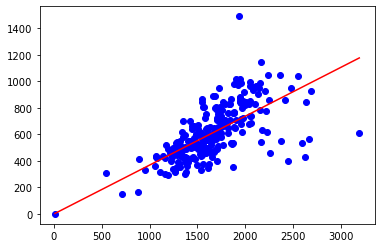

In [49]:
plt.scatter([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"], c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

***

## 2. Ridge Regression

In [50]:
point_per_hour_model_r = Ridge(fit_intercept=False)
point_per_hour_model_r.fit([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"])
print(point_per_hour_model_r)
print('Weight coefficients: ', point_per_hour_model_r.coef_)
print('y-axis intercept: ', point_per_hour_model_r.intercept_) 

Ridge(fit_intercept=False)
Weight coefficients:  [0.36847944]
y-axis intercept:  0.0


In [51]:
x_min_r = boxcox_hours_avg.min()
x_max_r = boxcox_hours_avg.max()
y_min_r = point_per_hour_model_r.predict([[x_min_r]])
y_max_r = point_per_hour_model_r.predict([[x_max_r]])
print(x_min_r, x_max_r)

10.790741429173076 3192.051738339011


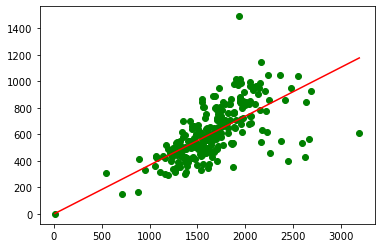

In [52]:
plt.scatter([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"], c='green')
plt.plot([x_min_r, x_max_r], [y_min_r, y_max_r], c='red')

***

## 3. LASSO Regression

In [53]:
point_per_hour_model_l = Lasso(fit_intercept=False)
point_per_hour_model_l.fit([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"])
print(point_per_hour_model_l)
print('Weight coefficients: ', point_per_hour_model_l.coef_)
print('y-axis intercept: ', point_per_hour_model_l.intercept_) 

Lasso(fit_intercept=False)
Weight coefficients:  [0.36847909]
y-axis intercept:  0.0


In [54]:
x_min_l = boxcox_hours_avg.min()
x_max_l = boxcox_hours_avg.max()
y_min_l = point_per_hour_model_l.predict([[x_min_l]])
y_max_l = point_per_hour_model_l.predict([[x_max_l]])
print(x_min_l, x_max_l)

10.790741429173076 3192.051738339011


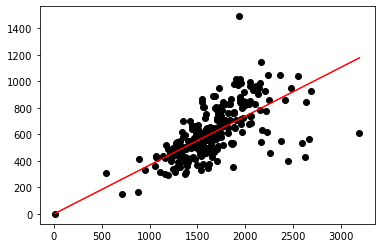

In [55]:
plt.scatter([[a] for a in boxcox_hours_avg], player_avg_dataframe["Points_avg"], c='black')
plt.plot([x_min_l, x_max_l], [y_min_l, y_max_l], c='red')

***

**All three Regression techniques give the same values and plots.**

**Some methods that can improve the model are-** 

1. **Taking a better comparison of data columns**
2. **Using a different approach to reduce the data values other than the average calculation.**

**This would overall increase the model's performance, and create a better regression approach.**

***

# 12. Regression with Original Dataset

### If we take the original country dataset for Linear, Ridge and LASSO,  this is what we get- 

***

## 1. Linear Regression

In [56]:
point_per_hour_model = LinearRegression(fit_intercept=False)
point_per_hour_model.fit([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"])
print(point_per_hour_model)
print('Weight coefficients: ', point_per_hour_model.coef_)
print('y-axis intercept: ', point_per_hour_model.intercept_) 

LinearRegression(fit_intercept=False)
Weight coefficients:  [0.22099987]
y-axis intercept:  0.0


In [57]:
r2_achievement = point_per_hour_model.score([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"])
print("R^2 for point_per_hour_model: {}".format(r2_achievement))

R^2 for point_per_hour_model: 0.9964403559644708


In [58]:
x_min = country_dataframe["Hours"].min()
x_max = country_dataframe["Hours"].max()
y_min = point_per_hour_model.predict([[x_min]])
y_max = point_per_hour_model.predict([[x_max]])
print(x_min, x_max)

13.9 236137390.5


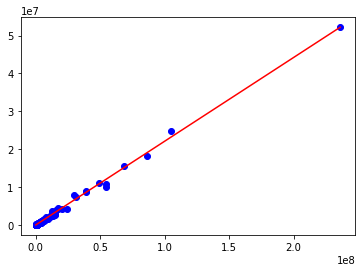

In [59]:
plt.scatter([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"], c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

***

## 2. Ridge Regression

In [60]:
point_per_hour_model_r = Ridge(fit_intercept=False)
point_per_hour_model_r.fit([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"])
print(point_per_hour_model_r)
print('Weight coefficients: ', point_per_hour_model_r.coef_)
print('y-axis intercept: ', point_per_hour_model_r.intercept_) 

Ridge(fit_intercept=False)
Weight coefficients:  [0.22099987]
y-axis intercept:  0.0


In [61]:
r2_achievement = point_per_hour_model_r.score([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"])
print("R^2 for point_per_hour_model: {}".format(r2_achievement))

R^2 for point_per_hour_model: 0.9964403559644708


In [62]:
x_min_r = country_dataframe["Hours"].min()
x_max_r = country_dataframe["Hours"].max()
y_min_r = point_per_hour_model_r.predict([[x_min_r]])
y_max_r = point_per_hour_model_r.predict([[x_max_r]])
print(x_min_r, x_max_r)

13.9 236137390.5


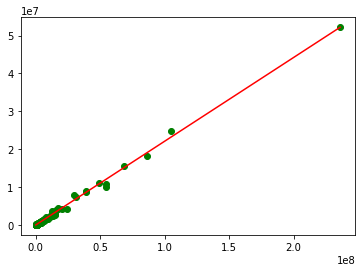

In [63]:
plt.scatter([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"], c='green')
plt.plot([x_min_r, x_max_r], [y_min_r, y_max_r], c='red')

***

## 3. LASSO Regression

In [64]:
point_per_hour_model_l = Lasso(fit_intercept=False)
point_per_hour_model_l.fit([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"])
print(point_per_hour_model_l)
print('Weight coefficients: ', point_per_hour_model_l.coef_)
print('y-axis intercept: ', point_per_hour_model_l.intercept_) 

Lasso(fit_intercept=False)
Weight coefficients:  [0.22099987]
y-axis intercept:  0.0


In [65]:
r2_achievement = point_per_hour_model_l.score([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"])
print("R^2 for point_per_hour_model: {}".format(r2_achievement))

R^2 for point_per_hour_model: 0.9964403559644708


In [66]:
x_min_l = country_dataframe["Hours"].min()
x_max_l = country_dataframe["Hours"].max()
y_min_l = point_per_hour_model_l.predict([[x_min_l]])
y_max_l = point_per_hour_model_l.predict([[x_max_l]])
print(x_min_l, x_max_l)

13.9 236137390.5


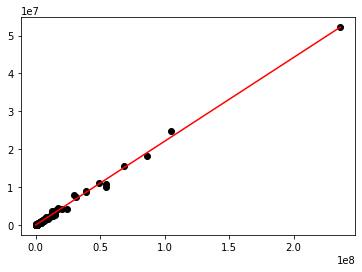

In [67]:
plt.scatter([[a] for a in country_dataframe["Hours"]], country_dataframe["Points"], c='black')
plt.plot([x_min_l, x_max_l], [y_min_l, y_max_l], c='red')

***

Still the same in all three regressions, but a better visualization of the linear data. This dataset seems to be `highly linear` in nature, and could be used to predict any value easily. The `r2 score of 0.99>` shows how less the errors are in the overall dataset, which were not that visible after taking the average of the dataframe values.

Sometimes, a normal approach to the model is better than the others,  and sometimes it isn't. Totally depends on the data itself.

***